<a href="https://colab.research.google.com/github/PhmHiu/HandWriting-Digits-Classification/blob/main/Nhan_biet_chu_viet_tay_60000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from keras.callbacks import EarlyStopping
from keras.layers.experimental.preprocessing import Normalization
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# 2. Load dữ liệu MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data(path="/content/drive/MyDrive/DATA/mnist.npz")
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)

(50000, 28, 28)


In [ ]:
# 3. Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
# 4. One hot encoding label (Y)
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ',Y_train[0])

Dữ liệu y ban đầu  5
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# 5. Định nghĩa model
model = Sequential()
 
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(64, 3, activation='relu', padding='same', input_shape=(28,28,1)))

# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,3,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())

# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
# Output layer với 10 node và dùng softmax function để chuyển sang xác xuất.
model.add(Dense(10, activation='softmax'))

In [ ]:
# 6. Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức 
# đùng để tối ưu hàm loss function.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# 7. Thực hiện train model với data
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, rotation_range=0.1, zoom_range=0.1)
it_train = datagen.flow(X_train, Y_train, batch_size=64)
steps = int(X_train.shape[0] / 64)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
H = model.fit(it_train, validation_data=(X_val, Y_val),
          batch_size=64, epochs=50, verbose=1)
model.summary()

Epoch 1/50
782/782 [==============================] - 14s 18ms/step - loss: 0.5277 - accuracy: 0.8965 - val_loss: 0.0536 - val_accuracy: 0.9858
Epoch 2/50
782/782 [==============================] - 14s 18ms/step - loss: 0.1279 - accuracy: 0.9616 - val_loss: 0.0602 - val_accuracy: 0.9807
Epoch 3/50
782/782 [==============================] - 14s 18ms/step - loss: 0.1006 - accuracy: 0.9688 - val_loss: 0.0447 - val_accuracy: 0.9870
Epoch 4/50
782/782 [==============================] - 14s 18ms/step - loss: 0.0922 - accuracy: 0.9717 - val_loss: 0.0430 - val_accuracy: 0.9882
Epoch 5/50
782/782 [==============================] - 14s 18ms/step - loss: 0.0847 - accuracy: 0.9746 - val_loss: 0.0410 - val_accuracy: 0.9897
Epoch 6/50
782/782 [==============================] - 14s 18ms/step - loss: 0.0788 - accuracy: 0.9766 - val_loss: 0.0404 - val_accuracy: 0.9892
Epoch 7/50
782/782 [==============================] - 14s 18ms/step - loss: 0.0705 - accuracy: 0.9789 - val_loss: 0.0395 - val_accuracy:

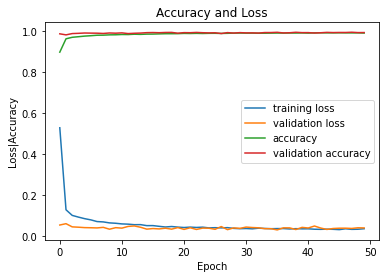

In [ ]:
# 8. Vẽ đồ thị loss, accuracy của traning set và validation set
fig = plt.figure()
numOfEpoch = len(H.history['val_loss'])
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [ ]:
# 9. Đánh giá model với dữ liệu test set
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.034165021032094955, 0.9922999739646912]


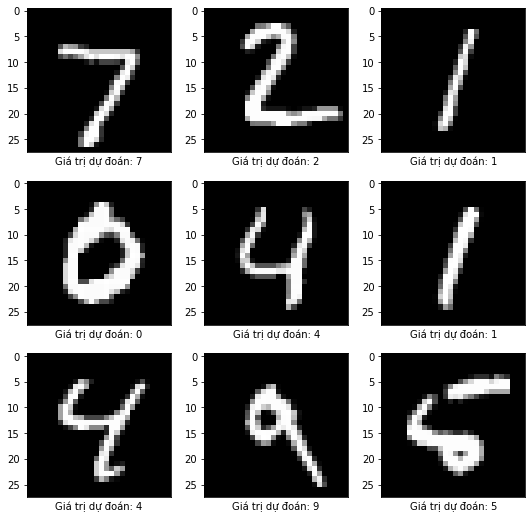

In [ ]:
# 10. Dự đoán ảnh
plt.figure(figsize=(9, 9))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(X_test[i].reshape(28,28), cmap='gray')
  y_predict = model.predict(X_test[i].reshape(1,28,28,1))
  plt.xlabel('Giá trị dự đoán: ' + str(np.argmax(y_predict)))
  plt.xticks([])